# Create plots
When this jupyter notebook is run, it shows all figures created for this assignment and saves each figure as a png file

Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

load in pickled data for the plots

In [4]:
year_papers = np.load("paper_per_year.npy", allow_pickle=True).tolist()
perc_languages = np.load("language_dict.npy", allow_pickle=True).tolist()
year_avg_refs = np.load("yearly_avg_refs.npy", allow_pickle=True).tolist()
year_avg_co = np.load("year_co_auths.npy", allow_pickle=True).tolist()

remove the year data that is faulty

In [5]:
year_papers.pop(1)
year_papers.pop(2028)
year_avg_refs.pop(1)
year_avg_refs.pop(2028)
year_avg_co.pop(1)
year_avg_co.pop(2028)

1.0

## Plot the figures

Papers per year

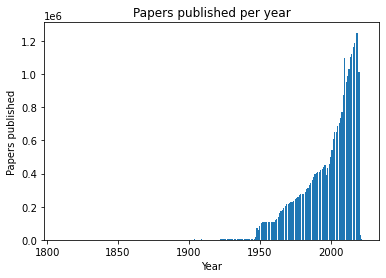

In [12]:
fig = plt.plot()
plt.bar(*zip(*year_papers.items()))
plt.title("Papers published per year")
plt.xlabel("Year")
plt.ylabel("Papers published")
plt.savefig('plots/year_papers.png')
plt.show()


Average co-authors

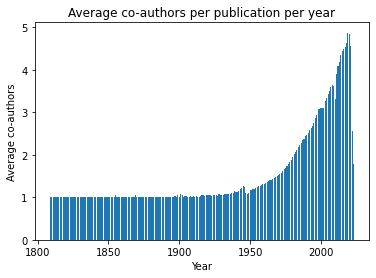

In [14]:
fig = plt.plot()
plt.bar(*zip(*year_avg_co.items()))
plt.title("Average co-authors per publication per year")
plt.xlabel("Year")
plt.ylabel("Average co-authors")
plt.savefig('plots/year_avg_co.png')
plt.show()

Average references

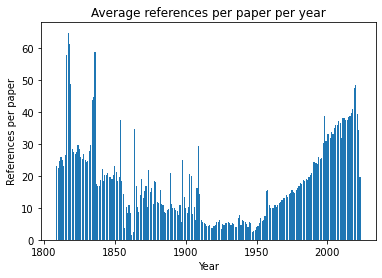

In [15]:
fig = plt.plot()
plt.bar(*zip(*year_avg_refs.items()))
plt.title("Average references per paper per year")
plt.xlabel("Year")
plt.ylabel("References per paper")
plt.savefig('plots/year_avg_refs.png')
plt.show()

Main language of all papers

/tmp/ipykernel_79632/3429628639.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.language = df["language"].str.replace("\['", "")
/tmp/ipykernel_79632/3429628639.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.language = df["language"].str.replace("'\]", "")
/tmp/ipykernel_79632/3429628639.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"perc":others, "language":"others"}, ignore_index=True)


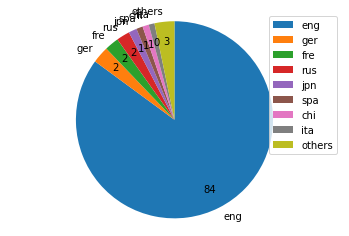

In [16]:
df = pd.DataFrame({"perc":perc_languages.values(),"language":perc_languages.keys()})
df = df.sort_values(by="perc", ascending=False).reset_index()
df.language = df["language"].str.replace("\['", "")
df.language = df["language"].str.replace("'\]", "")
### Combine categories
others = df.perc[8:].sum()
df = df.iloc[0:8]
df = df.append({"perc":others, "language":"others"}, ignore_index=True)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.pie(df.perc, labels=df.language, startangle=90, autopct=lambda x:int(x/100.*df.perc.sum()), pctdistance=0.8, counterclock=False)
ax.legend()
plt.axis('equal')
plt.savefig('plots/perc_languages.png')
plt.show()